<a href="https://colab.research.google.com/github/betty6you/TeamProject_group6/blob/main/Vacc_Brands_Reactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing dataset for analysis
import pandas as pd
df=pd.read_csv(r"ProcessedCovidVaccineReact.csv")
df

,Unnamed: 0,TweetDate,TweetText,CleanedTweet,TweetAuthor,TweetLocation,AllHashtags,Country
0,0,2021-03-28 23:59:54,22 CVS locations show #CovidVaccine slots in C...,22 cvs locations show covidvaccine slots in ca...,VaccineCa,Unknown,['CovidVaccine'],Unknown
1,1,2021-03-28 23:59:47,2020: We will be back to normal as soon as we ...,2020 we will be back to normal as soon as we h...,thinkbalancely,Australia,"['covid19qld', 'COVID19Aus', 'Covid_19', 'Covi...",Australia
2,2,2021-03-28 23:59:24,Amazingly if you open up the spots for younger...,amazingly if you open up the spots for younger...,AureliaCotta,Toronto,"['topoli', 'onpoli', 'COVID19Vaccine']",Canada
3,3,2021-03-28 23:58:40,@aussieinTO Exactly! Why are they hoarding vac...,aussieinto exactly why are they hoarding vacci...,JeanCourtney413,Retired Teacher/Public Servant,"['CovidVaccine', 'fordfiasco']",Unknown
4,4,2021-03-28 23:57:24,24 hours post-first #covid_19 shot &amp; thank...,24 hours postfirst covid_19 shot amp thankfull...,SumunLPendakur,Los Angeles,"['covid_19', 'vaccinated']",United States
...,...,...,...,...,...,...,...,...
178132,178132,2021-04-25 19:55:35,Double jabbed and feeling very happy (albeit i...,double jabbed and feeling very happy albeit it...,bears_katy,Unknown,"['COVID19Vaccine', 'GetVaccinated', 'FullyVacc...",Unknown
178133,178133,2021-04-25 19:55:12,Northlands is so busy right now you’d think th...,northlands is so busy right now youd think the...,Sharpie780,Edmonton,"['COVIDtesting', 'COVIDvaccine', 'COVIDab']",Canada
178134,178134,2021-04-25 19:55:03,#Covidvaccine clinics for eligible people with...,covidvaccine clinics for eligible people with ...,dudleymbc,Dudley,['Covidvaccine'],United Kingdom
178135,178135,2021-04-25 19:54:37,Guess who’s fully vaccinated now? 💉 #CovidVacc...,guess whos fully vaccinated now covidvaccine m...,enriquevbjr,California,"['CovidVaccine', 'Moderna', 'VaccinesWork', 'v...",United States


In [2]:
# Shaping data and dropping nulls
df.shape
dataset = df.dropna()
dataset.shape

(178137, 8)

In [4]:
# Manually declaring the reaction key words in a dictionary format by mapping with multiple values for single keys

reactionsAndItsKeywords = {'Fever' : ['fever'],
                           'Chills': ['chills'],
                           'Headache' : ['headache'],
                           'Cold' : ['cold', 'flu'],
                           'Body pains' : ['body pain','body pains'],
                           'Sore arm' : ['sore arm','arm soreness','arm sore','swollen','injection area','tender arm'],
                           'Cough' : ['cough','coughing','sore throat'],
                           'Blood Clots' : ['blood clots'],
                           'Vomiting' : ['vomiting','throw up', 'nausea'],
                           'Fatigues' : ['fatigues'],
                           'Heart Attack' :['heartattack','heart attack','heartpain','heart pain'],
                           'Kidney Failure': ['kidney']}

# Function to check reactions with respect to each brand
def getReactions(brand, reactionVsItsCount):
  # passing the reaction through tweets to check the respective brand
  for tweet in df["CleanedTweet"]:
    try:
      if tweet.find(brand) != -1:  # Check if brand exist in tweet
        for reaction, keywords in reactionsAndItsKeywords.items(): # Iterate through each tweet when brand exist to check if any reactions from 
                                                                   # From the map exists
          for keyword in keywords:
            if(keyword in tweet):
              if reaction not in reactionVsItsCount.keys():        # If both brand and reactions exist creating dictionary mapping multiple reactions for each brand
                reactionVsItsCount[reaction] = 1
              else:
                reactionVsItsCount[reaction] = reactionVsItsCount[reaction]+1
              


    except Exception as ex:
      pass
  return reactionVsItsCount
                            

In [5]:
# Manually declaring vaccine brands by identifying the existing one from the tweets processed data
vaccinesAndItsKeyWords = {"Covaxin":['covax','vax','behalf_covax','covaxin','covaxsd','covaxinrockstheworld','covaxvaccinations','covaxinreiterated'],
                          "Pfizer":['pfizercovidvaccine','pfizervaccine','pfizer','modernapfizer','biotech','pfizerbiotech','pfizerbiontech'],
                          "Moderna" : ['moderna','modernavaccine','teammoderna','modernagang','modernas'],
                          "Johnson&Johnson" : ['borisjohnson','johnsonandjohnson',
                                               'johnsonandjohnsonvaccine','johnsonjohnson',
                                               'johnsonampjohnson','johnsonjohnsonvax','johnsonand','johnson','janssenglobal','janssenvaccine','janssen','janssenus'],
                          "Covishield" :['covishield','covishieldvaccine','covishielded'],
                          "Astrazeneca" : ['astrazeneca','oxford','breakingastrazeneca','oxfordastrazeneca','astrazenecas',
                                            'astrazenecavaccine','astrazenecaoxford','astrazenecauk'],
                          "Sputnik" : ['sputnikint','sputnik','sputnikvaccine','sputnikv','sputnikvaccineke',
                                        'sputnikvaccineinkenya','sputnikvaccinekenya']
                          }               

reactions=[]
brandVsReactions= {}

for vaccine, keywords  in vaccinesAndItsKeyWords.items():
  reactionsVsCount={}
  for keyword in keywords:
    try:
        reactionsVsCount = getReactions(keyword,reactionsVsCount) # Function to check reactions for each barnd passed
    except:
        print ("Error while checking brand")
  brandVsReactions[vaccine] = reactionsVsCount

print(brandVsReactions)

{'Covaxin': {'Cold': 87, 'Fever': 34, 'Kidney Failure': 4, 'Body pains': 10, 'Blood Clots': 36, 'Chills': 17, 'Headache': 21, 'Cough': 6, 'Sore arm': 29, 'Vomiting': 3, 'Heart Attack': 4}, 'Pfizer': {'Sore arm': 338, 'Fever': 192, 'Headache': 244, 'Vomiting': 50, 'Chills': 115, 'Cold': 163, 'Kidney Failure': 8, 'Cough': 24, 'Blood Clots': 53, 'Heart Attack': 11, 'Body pains': 2}, 'Moderna': {'Sore arm': 204, 'Kidney Failure': 4, 'Fever': 155, 'Chills': 116, 'Cold': 124, 'Headache': 168, 'Vomiting': 36, 'Blood Clots': 27, 'Cough': 4, 'Body pains': 1, 'Heart Attack': 2}, 'Johnson&Johnson': {'Cold': 92, 'Blood Clots': 345, 'Kidney Failure': 2, 'Headache': 103, 'Chills': 70, 'Fever': 87, 'Cough': 23, 'Vomiting': 17, 'Sore arm': 60, 'Fatigues': 3}, 'Covishield': {'Blood Clots': 8, 'Fever': 35, 'Kidney Failure': 1, 'Body pains': 8, 'Vomiting': 3, 'Cough': 5, 'Chills': 1, 'Headache': 4, 'Cold': 4}, 'Astrazeneca': {'Sore arm': 67, 'Cold': 102, 'Fever': 73, 'Headache': 130, 'Kidney Failure': 8,

In [6]:
# Creating a data frame
df = pd.DataFrame(brandVsReactions, index=['Covaxin', 'Pfizer', 'Moderna','Johnson&Johnson','Covishield','Astrazeneca','Sputnik'])

In [7]:
# Dropping Nan if exist
df= pd.DataFrame.from_dict(brandVsReactions)
df.fillna(0, inplace=True)
df

,Covaxin,Pfizer,Moderna,Johnson&Johnson,Covishield,Astrazeneca,Sputnik
Cold,87.0,163.0,124.0,92.0,4.0,102,23.0
Fever,34.0,192.0,155.0,87.0,35.0,73,0.0
Kidney Failure,4.0,8.0,4.0,2.0,1.0,8,0.0
Body pains,10.0,2.0,1.0,0.0,8.0,6,2.0
Blood Clots,36.0,53.0,27.0,345.0,8.0,698,9.0
Chills,17.0,115.0,116.0,70.0,1.0,38,0.0
Headache,21.0,244.0,168.0,103.0,4.0,130,0.0
Cough,6.0,24.0,4.0,23.0,5.0,9,0.0
Sore arm,29.0,338.0,204.0,60.0,0.0,67,3.0
Vomiting,3.0,50.0,36.0,17.0,3.0,17,0.0


In [14]:
df['percent_Covaxin'] = (df['Covaxin'] / df['Covaxin'].sum()) * 100
decimals = 1    
df['percent_Covaxin'] = df['percent_Covaxin'].apply(lambda x: round(x, decimals))
df['percent_Pfizer']=(df['Pfizer']/df['Pfizer'].sum()) *100
decimals = 1    
df['percent_Pfizer'] = df['percent_Pfizer'].apply(lambda x: round(x, decimals))
df['percent_Moderna']=(df['Moderna']/df['Moderna'].sum()) *100
decimals = 1    
df['percent_Moderna'] = df['percent_Moderna'].apply(lambda x: round(x, decimals))
df['percent_JJ']=(df['Johnson&Johnson']/df['Johnson&Johnson'].sum()) *100
decimals = 1    
df['percent_JJ'] = df['percent_JJ'].apply(lambda x: round(x, decimals))
df['percent_CS']=(df['Covishield']/df['Covishield'].sum()) *100
decimals = 1    
df['percent_CS'] = df['percent_CS'].apply(lambda x: round(x, decimals))
df['percent_A']=(df['Astrazeneca']/df['Astrazeneca'].sum()) *100
decimals = 1    
df['percent_A'] = df['percent_A'].apply(lambda x: round(x, decimals))
df['percent_Sputnik']=(df['Sputnik']/df['Sputnik'].sum()) *100
decimals = 1    
df['percent_Sputnik'] = df['percent_Sputnik'].apply(lambda x: round(x, decimals))

df

,Covaxin,Pfizer,Moderna,Johnson&Johnson,Covishield,Astrazeneca,Sputnik,percent_Covaxin,percent_Pfizer,percent_Moderna,percent_JJ,percent_CS,percent_A,percent_Sputnik
Cold,87.0,163.0,124.0,92.0,4.0,102,23.0,34.7,13.6,14.7,11.5,5.8,8.8,62.2
Fever,34.0,192.0,155.0,87.0,35.0,73,0.0,13.5,16.0,18.4,10.8,50.7,6.3,0.0
Kidney Failure,4.0,8.0,4.0,2.0,1.0,8,0.0,1.6,0.7,0.5,0.2,1.4,0.7,0.0
Body pains,10.0,2.0,1.0,0.0,8.0,6,2.0,4.0,0.2,0.1,0.0,11.6,0.5,5.4
Blood Clots,36.0,53.0,27.0,345.0,8.0,698,9.0,14.3,4.4,3.2,43.0,11.6,60.3,24.3
Chills,17.0,115.0,116.0,70.0,1.0,38,0.0,6.8,9.6,13.8,8.7,1.4,3.3,0.0
Headache,21.0,244.0,168.0,103.0,4.0,130,0.0,8.4,20.3,20.0,12.8,5.8,11.2,0.0
Cough,6.0,24.0,4.0,23.0,5.0,9,0.0,2.4,2.0,0.5,2.9,7.2,0.8,0.0
Sore arm,29.0,338.0,204.0,60.0,0.0,67,3.0,11.6,28.2,24.3,7.5,0.0,5.8,8.1
Vomiting,3.0,50.0,36.0,17.0,3.0,17,0.0,1.2,4.2,4.3,2.1,4.3,1.5,0.0


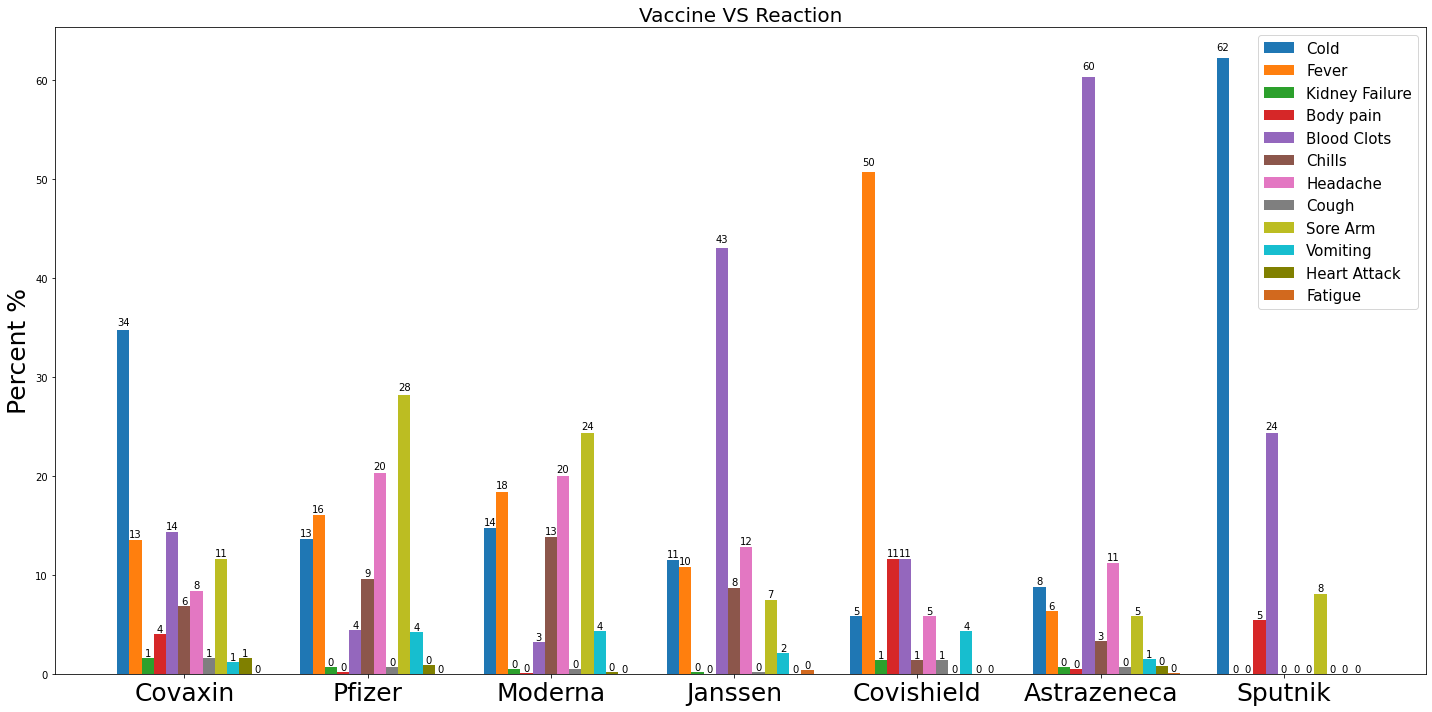

In [51]:
import numpy as np
import matplotlib.pyplot as plt

N = 7
ind = np.arange(0,20,3)  # the x locations for the groups
width = 0.2       # the width of the bars

fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(111)

yvals = [34.7,	13.6,	14.7,	11.5,	5.8,	8.8,	62.2]

rects1 = ax.bar(ind, yvals, width)
zvals = [13.5,	16.0,	18.4,	10.8,	50.7,	6.3,	0.0]
rects2 = ax.bar(ind+width, zvals, width)
kvals = [1.6,	0.7,	0.5,	0.2,	1.4,	0.7,	0.0]
rects3 = ax.bar(ind+width*2, kvals, width)
lvals=[4.0,	0.2,	0.1,	0.0,	11.6,	0.5,	5.4]
rects4=ax.bar(ind+width*3,lvals,width)
mvals=[14.3,	4.4,	3.2,	43.0,	11.6,	60.3,	24.3]
rects5=ax.bar(ind+width*4,mvals,width)
nvals=[6.8,	9.6,	13.8,	8.7,	1.4,	3.3,	0.0]
rects6 = ax.bar(ind+width*5, nvals, width)
ovals=[8.4,	20.3,	20.0,	12.8,	5.8	,11.2	,0.0]
rects7 = ax.bar(ind+width*6, ovals, width)
pvals=[2.4,	2.0,	0.5,	2.9,	7.2	,0.8,	0.0]
rects8 = ax.bar(ind+width*7, kvals, width)
qvals=[11.6,	28.2,	24.3,	7.5,	0.0,	5.8,	8.1]
rects9=ax.bar(ind+width*8,qvals, width)
uvals=[1.2,	4.2,	4.3,	2.1,	4.3,	1.5,	0.0]
rects10=ax.bar(ind+width*9,uvals,width)
vvals=[1.6,	0.9,	0.2,	0.0,	0.0,	0.8,	0.0]
rects11=ax.bar(ind+width*10,vvals,width,color='olive')
wvals=[0.0,	0.0,	0.0,	0.4	,0.0,	0.1,	0.0]
rects12=ax.bar(ind+width*11,wvals,width,color='chocolate')

ax.set_ylabel('Percent %',fontsize=25)
ax.set_title('Vaccine VS Reaction',fontsize=20)
ax.set_xticks(ind+width*5)
ax.set_xticklabels( ('Covaxin', 'Pfizer', 'Moderna','Janssen','Covishield','Astrazeneca','Sputnik'),fontsize=25  )
ax.legend( (rects1[0], rects2[0], rects3[0],rects4[0],rects5[0],rects6[0],rects7[0],rects8[0],rects9[0],rects10[0],rects11[0],rects12[0]), ('Cold', 'Fever', 'Kidney Failure','Body pain','Blood Clots','Chills','Headache','Cough','Sore Arm','Vomiting','Heart Attack','Fatigue'),fontsize=15 )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2, 1.01*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)
autolabel(rects8)
autolabel(rects9)
autolabel(rects10)
autolabel(rects11)
autolabel(rects12)
#plt.show()
plt.tight_layout()
plt.savefig('VaccineReaction.png',dpi=300)